<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday21062022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import numpy as np
from matplotlib import font_manager as fm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
# Font control
!wget 'https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc'
font_files = fm.findSystemFonts('.')
# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    print(font_file)

# Use your new font on all your plots.
plt.rc('font', family='Avenir')

--2022-06-22 02:49:09--  https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc [following]
--2022-06-22 02:49:10--  https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1639536 (1.6M) [application/octet-stream]
Saving to: ‘Avenir.ttc’

Avenir.ttc          100%[===================>]   1.56M  --.-KB/s    in 0.02s   

2022-06-22 02:49:10 (74.6 MB/s) - ‘Avenir.ttc’ saved [1639536/1639536]

/content/Avenir.ttc


In [252]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/\
rfordatascience/tidytuesday/master/data/2022/2022-06-21/firsts.csv')

# Processing dataset

# Regex Functions to process the text descriptions
dropfirst = lambda x : x[5:]
findname = lambda x : re.findall(
    r'([a-zA-Z\s\.\']*?)[,|\[|\(|\;]', x) or x
def getname(input):
  if type(input) == list:
    return input[0]
  return input
# These would be specified in the title and does not need repetition
dropaa = lambda x : re.sub('African-American ', '', x)
dropwoman = lambda x : re.sub('woman ', '', x)
capitalise = lambda x : x.title()

# Filtering
#df.groupby(['category', 'gender']).count()
df = df[(df.gender == 'Female African American Firsts') 
        & (df.category.isin(['Education & Science', 'Law', 'Politics']))]
df = df.drop(['gender'], axis=1)
df = pd.concat([df.iloc[1:15:2], df.iloc[16:28:5], 
                df.iloc[29::4]])  # Only sample some rows
df.accomplishment = df.accomplishment.apply(dropfirst).apply(
    dropaa).apply(dropwoman).apply(capitalise)
df['person'] = df.person.apply(findname).apply(getname)
df = df.reset_index().drop(['index'], axis=1)

# Wrap text
df.loc[2, 'accomplishment'] = df['accomplishment'][2][:44] + \
'\n' + df['accomplishment'][2][44:]
df.loc[13, 'accomplishment'] = df['accomplishment'][13][:32] + \
'\n' + df['accomplishment'][13][32:]  # Wrap

# Randomise positions
for row in df.itertuples():
  Random = np.random.default_rng(row[0])
  df.loc[row[0], 'ycoord'] = 5 * (-1) ** row[0] + (
      Random.random() - .5) * 5

In [253]:
# Preview
df

,year,accomplishment,person,category,ycoord
0,1858,College Instructor,Sarah Jane Woodson Early,Education & Science,5.684808
1,1864,In The United States To Earn An M.D.,Dr. Rebecca Davis Lee Crumpler,Education & Science,-4.940892
2,1882,Fully State-Supported Four-Year Institution\n...,Virginia State University,Education & Science,3.808061
3,1890,To Earn A Dental Degree In The United States,Ida Rollins,Education & Science,-7.071754
4,1903,To Found And Become President Of A Bank,Maggie L. Walker,Politics,7.215281
5,1931,To Graduate From Yale Law School,Jane Matilda Bolin,Law,-3.474985
6,1938,Elected To A State Legislature,Crystal Bird Fauset,Politics,5.190822
7,1952,Elected To A U.S. State Senate,Cora Brown,Politics,-4.374523
8,1968,As Presidential Candidate,Charlene Mitchell,Politics,4.134861
9,1977,In The U.S. Cabinet,Patricia Roberts Harris,Politics,-3.148754


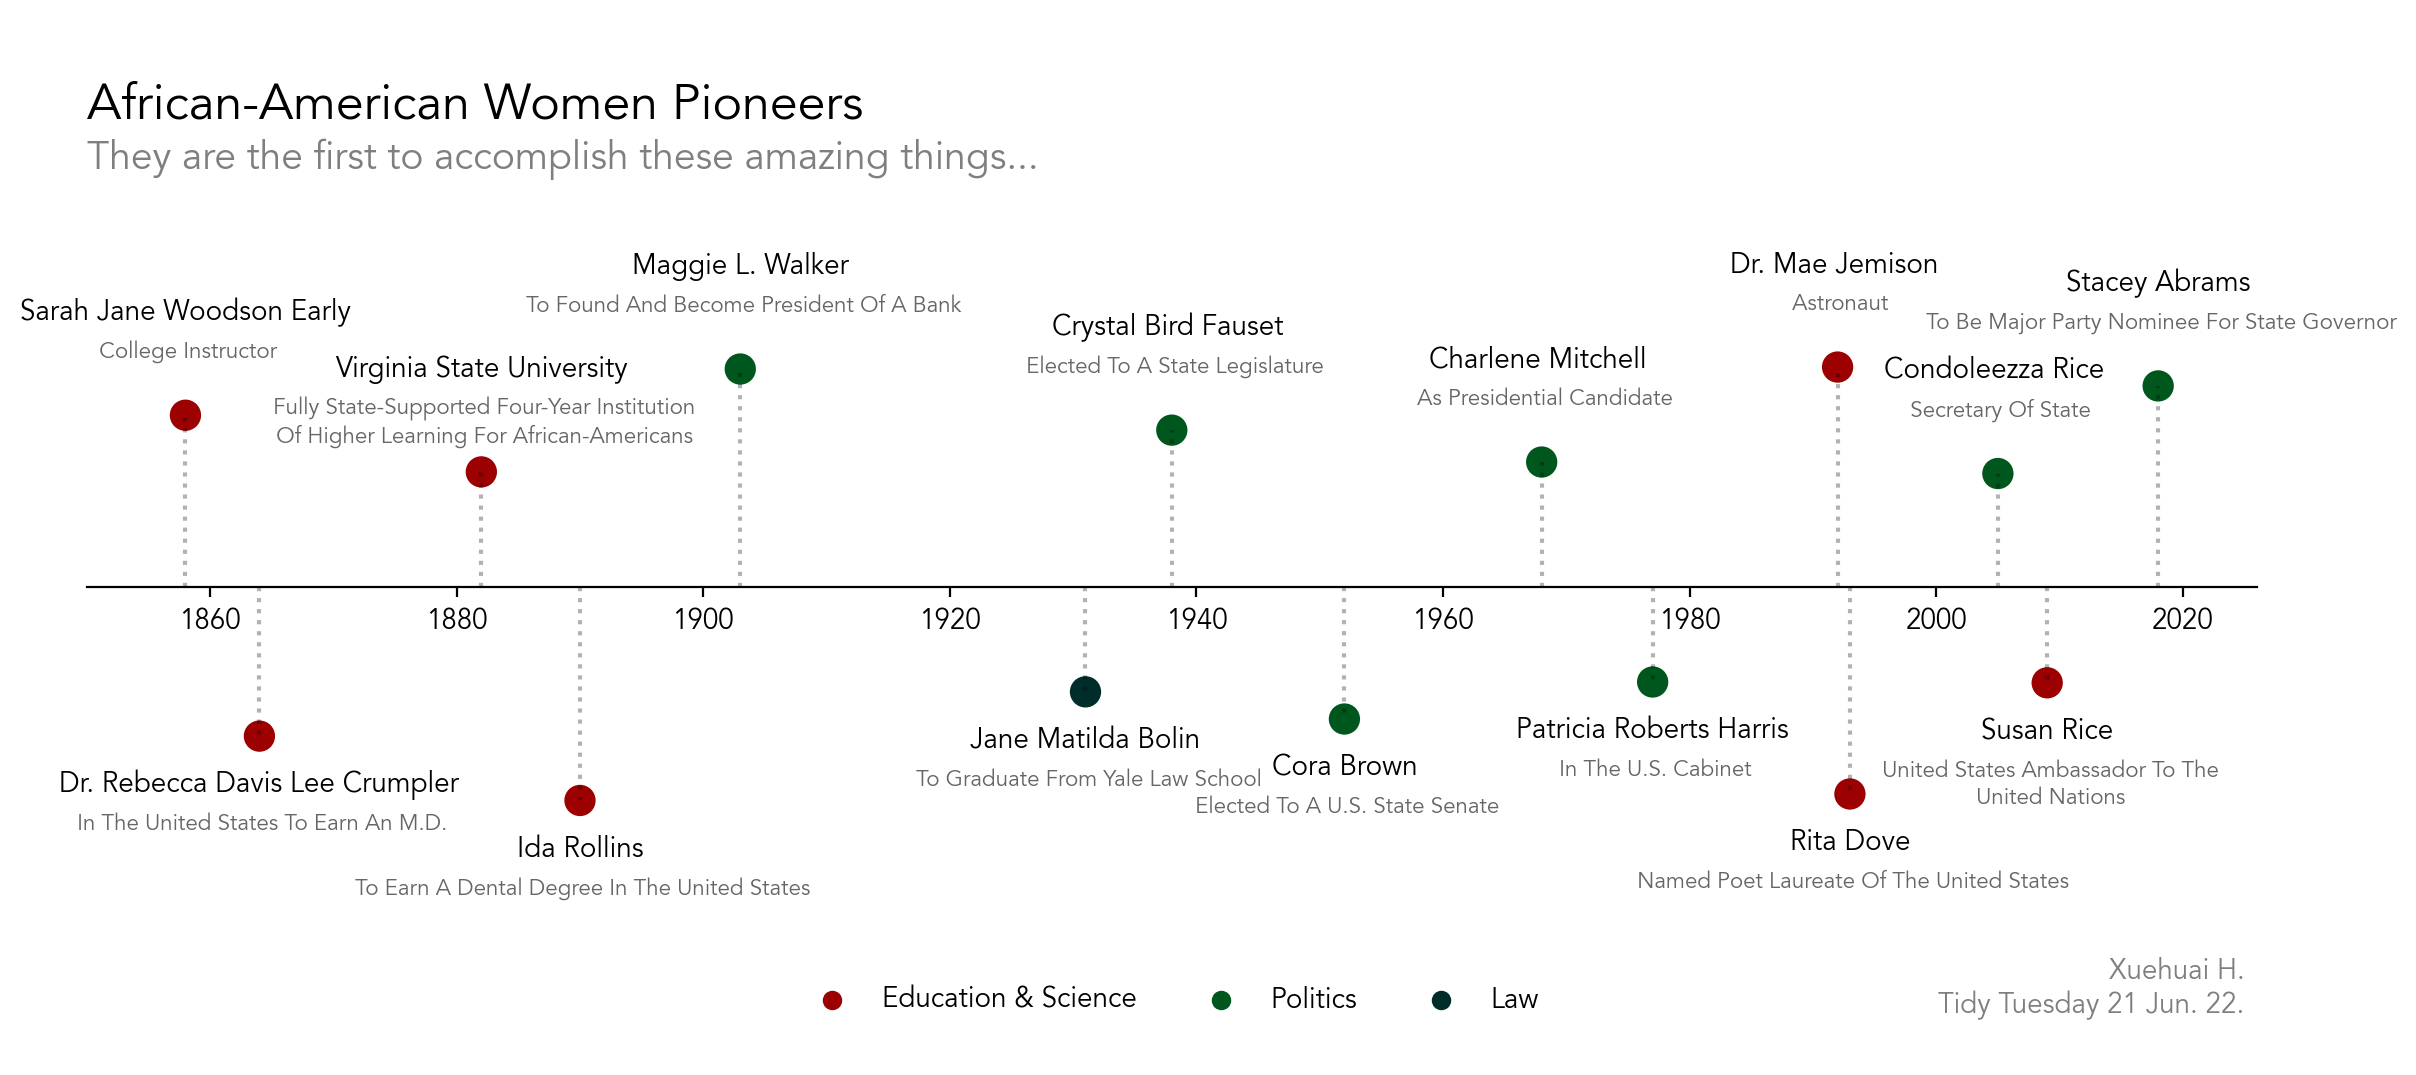

In [262]:
# Plotting

fig, ax = plt.subplots(dpi=200, 
                 figsize=(14, 6), 
                 facecolor='w')

sns.scatterplot(data=df,
                x='year',
                y='ycoord',
                hue='category',
                palette=['#9d0000',
                         '#00571d',
                         '#002d2a'],
                s=150,
                )

plt.vlines(data=df,
           x='year',
           ymin=0,
           ymax='ycoord',
           linestyles='dotted',
           linewidth=1.5,
           alpha=0.3)


for row in df.itertuples():
  plt.text(row[1], row[-1] + 2.5 * (-1) ** row[0] + 0.4,  # Offsetting
           row[3],  # Name of the person
           ha='center',
           va='bottom',
           fontsize=10)
  plt.text(row[1], row[-1] + 2.5 * (-1) ** row[0],  # Offsetting
           row[2],  # Accomplishment
           ha='center',
           va='top',
           fontsize=8,
           alpha=0.6,
           wrap=True)


sns.despine(fig, left=True,
            #bottom=True, 
            #trim=True
            )
# Bring the timeline to the centre
ax.spines['bottom'].set_position('center') 
plt.ylim(-15, 15)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.xscale('linear')

plt.title('\nAfrican-American Women Pioneers',
          fontdict={'fontsize': 18},
          loc='left')
plt.text(1850, 13.5,
         'They are the first to accomplish these amazing things...',
         ha='left',
         va='bottom',
         fontsize=14,
         alpha=0.5)
plt.legend(title='',
           frameon=False,
           ncol=3,
           fancybox=False,
           loc='lower center')
# My sign off :))
plt.text(2025, -15.5,
         'Xuehuai H.\nTidy Tuesday 21 Jun. 22.\n',
         ha='right',
         va='bottom',
         fontsize=10,
         alpha=0.5)

plt.show()